# 1-逻辑回归-线性可分
## 案例：根据学生两门课成绩，预测学生是否会被录取
### 数据集：ex2data1.txt

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path,names=['Exam1','Exam2','Accepted'])
data.head()

,Exam1,Exam2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


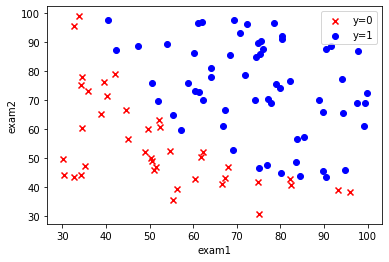

In [6]:
fig,ax = plt.subplots()

ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c='r',marker='x',label='y=0') #y=0的散点图
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c='b',marker='o',label='y=1') #y=1的散点图
ax.legend()

ax.set(xlabel='exam1',ylabel='exam2')
plt.show()

In [7]:
def get_Xy(data):
    """构造数据集函数"""
    data.insert(0,'ones',1)
    X_ = data.iloc[:,0:-1]
    X = X_.values
    
    y_ = data.iloc[:,-1]
    y = y_.values.reshape(len(y_),1)
    
    return X,y

In [8]:
X,y = get_Xy(data)

In [9]:
X.shape

(100, 3)

In [10]:
y.shape

(100, 1)

In [12]:
def sigmoid(z):
    
    return 1/(1 + np.exp(-z))

In [13]:
def costFunction(X,y,theta):
    
    y_ = sigmoid(X@theta)
    first = y * np.log(y_)
    second = (1-y) * np.log(1-y_)
    
    return - np.sum(first+second) / len(X)

In [16]:
theta = np.zeros((3,1))
theta.shape

(3, 1)

In [17]:
cost_init = costFunction(X,y,theta)
print(cost_init)

0.6931471805599453


In [19]:
def gradientDescent(X,y,theta,iters,alpha,isprint=False):
    m = len(X)
    costs = []
    
    for i in range(iters):
        theta = theta - (alpha/m) * X.T @ (sigmoid(X@theta) - y)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
        if isprint == True:
            if i % 1000 == 0:
                print(cost)
    return costs,theta

In [22]:
alpha = 0.004
iters = 200000

In [24]:
costs,theta_final = gradientDescent(X,y,theta,iters,alpha,True)

1.9886538578930084
3.1129016786938837
5.5152253116326495
1.8936174790893165
3.102694213971719
5.510560324147868
1.8890322287762062
3.090435144893324
5.505882914187052
1.8844353285951236
3.078170019864155
5.501189056659108
1.879826946965165
3.065898552858728
5.496478844619876
1.8752072410671232
3.053620467637462
5.491752355327144
1.8705763545240162
3.0413354994131057
5.487009635362496
1.8659344168059433
3.0290433965306733
5.482250735086736
1.8612815426210572
3.016743922160361
5.477475662332369
1.8566178312942574
3.0044368560025974
5.472684421183951
1.8519433661332634
2.992121996003985
5.467876994438359
1.8472582137828903
2.9797991600827567
5.463053339088442
1.8425624235697733
2.967468187861947
5.458213395188881
1.8378560268364066
2.9551289424083595
5.453357081517348
1.8331390362669244
2.942781311974967
5.4484842878267905
1.828411445206938
2.930425211744266
5.443594885853989
1.8236732269758755
2.9180605855697035
5.438688730769618
1.8189243341765087
2.905687407712073
5.433765631108164
1.8

3.7379122586603324
3.7345650106800803
1.9813758407742108
3.60032787528197
1.0939024522165648
0.2546320162297572
1.3978946326401374
1.2778177578114644
3.408095138222504
0.2813949652255523
0.28403008381623446
0.5693515951006966
2.3074041916037706
1.3468390776843462
1.0064385970618241
0.4238330060407341
0.4608824914619092
0.23901690392976074
1.067866944513973
3.1259758192590756
0.8040201118506516
1.0701916002225595
1.2262932519858891
0.4813684148116112
0.4718925639227276
0.7449526797533277
1.3052923833761352
1.0878938351995047
0.37391616494647173
2.061144401774728
0.26839632646204487
0.25340865483626446
0.25653969928086495
3.32880371786053
0.263172299128752
0.24137633211243145
0.33821894733290153
0.7578046606406217
2.344070955838633
0.44403269885294144
0.24523623659870075
0.4580944481976746
0.91341017754639
0.3432863147326382
2.738365423749487
1.4617525636189808
0.44547508867670205
3.5636981703330877
0.5500986408833889
3.365759335798076
0.7696907304106029
0.703516012479133
0.4264858461251

1.1184563671688539
1.1168756624074843
1.115295766711715
1.1137166848632623
1.112138421685652
1.1105609820436693
1.1089843708429172
1.107408593029217
1.1058336535882107
1.1042595575448189
1.1026863099626751
1.1011139159436545
1.0995423806273426
1.0979717091904644
1.0964019068464137
1.0948329788446494
1.0932649304701605
1.0916977670429397
1.0901314939174098
1.0885661164818639
1.0870016401578644
1.085438070399734
1.083875412693923
1.08231367255846
1.0807528555423327
1.0791929672249347
1.0776340132154465
1.0760759991522304
1.0745189307022123
1.0729628135603166
1.0714076534488224
1.0698534561167277
1.0683002273391626
1.066747972916728
1.0651966986748596
1.0636464104632775
1.0620971141551983
1.0605488156468226
1.0590015208566053
1.057455235724647
1.055909966212048
1.0543657183001727
1.0528224979900822
1.0512803113018154
1.0497391642737188
1.048199062961808
1.0466600134390471
1.0451220217947026
1.0435850941336648
1.042049236575701
1.0405144552548857
1.0389807563187887
1.0374481459278475
1.035

0.5375550661908335
0.5366934785766887
0.5358333122407368
0.53497456569497
0.5341172374619574
0.5332613260748452
0.5324068300773742
0.5315537480238892
0.5307020784793439
0.5298518200193221
0.5290029712300153
0.5281555307082427
0.5273094970614656
0.5264648689077663
0.5256216448758724
0.5247798236051353
0.5239394037455628
0.5231003839577697
0.5222627629130184
0.5214265392931927
0.5205917117908017
0.5197582791089749
0.5189262399614353
0.5180955930725326
0.5172663371771997
0.5164384710209545
0.515611993359891
0.5147869029606683
0.5139631986004966
0.5131408790671285
0.512319943158846
0.5115003896844356
0.5106822174631712
0.5098654253248184
0.5090500121096043
0.5082359766681847
0.5074233178616532
0.5066120345615008
0.5058021256496048
0.5049935900182027
0.5041864265698623
0.5033806342174825
0.5025762118842436
0.5017731585035944
0.5009714730192237
0.500171154385037
0.49937220156512657
0.498574613533739
0.49777838927525403
0.4969835277841473
0.49619002806497403
0.4953978891323178
0.4946071100107

0.2855236688462359
0.28521553543060835
0.28490840998368844
0.28460229018559496
0.2842971737112302
0.2839930582303809
0.28368994140779835
0.2833878209033076
0.28308669437189343
0.2827865594638036
0.2824874138246518
0.2821892550954879
0.2818920809129326
0.28159588890922593
0.2813006767123652
0.2810064419461838
0.28071318223044306
0.28042089518093255
0.2801295784095708
0.27983922952448925
0.27954984613014
0.279261425827373
0.27897396621355186
0.27868746488264007
0.2784019194252868
0.2781173274289373
0.2778336864779127
0.277550994153517
0.2772692480341116
0.27698844569523895
0.2767085847096871
0.2764296626475893
0.27615167707653543
0.27587462556163145
0.27559850566562466
0.27532331494897755
0.2750490509699536
0.27477571128473105
0.27450329344747104
0.2742317950104189
0.2739612135239893
0.2736915465368605
0.2734227915960677
0.2731549462470804
0.2728880080338965
0.27262197449913544
0.27235684318411185
0.2720926116289459
0.2718292773726259
0.2715668379531096
0.2713052909074101
0.2710446337716

In [25]:
theta_final

array([[-23.77314018],
       [  0.18687162],
       [  0.18041411]])

In [27]:
def predict(X,theta):
    """预测结果函数"""
    prob = sigmoid(X@theta)
    return [1 if x>= 0.5 else 0 for x in prob]

In [28]:
y_ = np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1) #计算预测值并转换成数组

acc = np.mean(y_pre == y) #计算平均正确率

print(acc)

0.86


In [29]:
coef1 = - theta_final[0,0] / theta_final[2,0]
coef2 = - theta_final[1,0] / theta_final[2,0] #决策边界系数

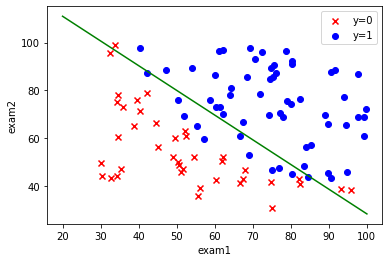

In [30]:
x = np.linspace(20,100,100)
f = coef1 + coef2 * x #决策边界函数

fig,ax = plt.subplots()

ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c='r',marker='x',label='y=0') #y=0的散点图
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c='b',marker='o',label='y=1') #y=1的散点图
ax.legend()

ax.set(xlabel='exam1',ylabel='exam2')

ax.plot(x,f,c='g')
plt.show()